# Topic:        Challenge Set 1
# Subject:      Explore MTA turnstile data
# Date:         01/23/2017
# Name:         Rosie Hoyem

### Challenge 1

Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like:

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [2]:
df = pd.read_csv('data/turnstile_160507.txt')

df.columns =['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS']

df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197


# Challenge 2

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [4]:
import dateutil.parser

df['date_time'] = df['DATE'] + " " + df['TIME']

parse_time = lambda x: dateutil.parser.parse(x, dayfirst=False)
df['date_time'] = df['date_time'].apply(parse_time)

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00


# Challenge 3

These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [5]:
df.set_index(['C/A','UNIT','SCP','STATION'])

df_gr3 = df.groupby(['C/A', 'UNIT','STATION','SCP','DATE'], as_index=False).sum()

df_gr3.head()

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,04/30/2016,33841360,11460585
1,A002,R051,59 ST,02-00-00,05/01/2016,33847030,11462511
2,A002,R051,59 ST,02-00-00,05/02/2016,33852490,11464986
3,A002,R051,59 ST,02-00-00,05/03/2016,33862902,11468685
4,A002,R051,59 ST,02-00-00,05/04/2016,33873320,11472445


# Challenge 4

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

```
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
```

In [6]:
df['date_object'] = df['DATE'].apply(parse_time)
df_gr4 = df.groupby(['C/A', 'UNIT','STATION','SCP','date_object'], as_index=False).sum()
df_gr4.head()

,C/A,UNIT,STATION,SCP,date_object,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,2016-04-30,33841360,11460585
1,A002,R051,59 ST,02-00-00,2016-05-01,33847030,11462511
2,A002,R051,59 ST,02-00-00,2016-05-02,33852490,11464986
3,A002,R051,59 ST,02-00-00,2016-05-03,33862902,11468685
4,A002,R051,59 ST,02-00-00,2016-05-04,33873320,11472445


In [7]:
df_gr4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32078 entries, 0 to 32077
Data columns (total 7 columns):
C/A            32078 non-null object
UNIT           32078 non-null object
STATION        32078 non-null object
SCP            32078 non-null object
date_object    32078 non-null datetime64[ns]
ENTRIES        32078 non-null int64
EXITS          32078 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.0+ MB


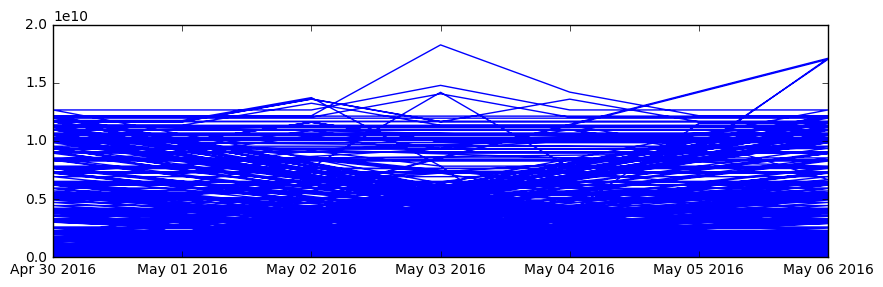

In [8]:
dates = df_gr4['date_object']
counts = df_gr4['ENTRIES']
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

# Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [9]:
df_gr5 = df.groupby(['C/A', 'UNIT','STATION','SCP','date_object'], as_index=False).sum()

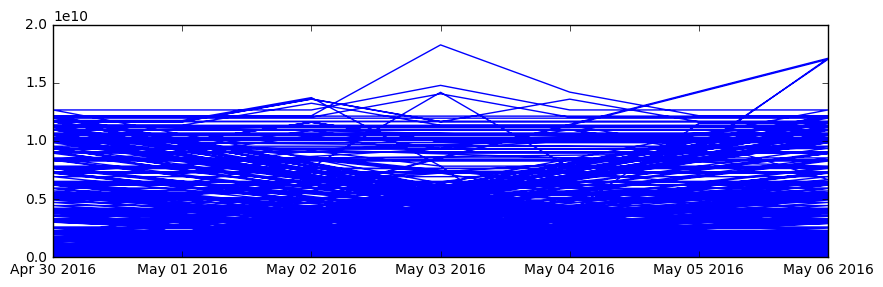

In [10]:
dates = df_gr5['date_object']
counts = df_gr5['ENTRIES']
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

# Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [11]:
df_gr6 = df.groupby(['STATION', 'date_object'], as_index=False).sum()

df_gr6.head()

,STATION,date_object,ENTRIES,EXITS
0,1 AV,2016-04-30,9365210271,20854612574
1,1 AV,2016-05-01,9365326117,20854690837
2,1 AV,2016-05-02,10251131526,21725423983
3,1 AV,2016-05-03,9365572701,20854843128
4,1 AV,2016-05-04,9365722761,20854931387


In [12]:
df_gr6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 4 columns):
STATION        2597 non-null object
date_object    2597 non-null datetime64[ns]
ENTRIES        2597 non-null int64
EXITS          2597 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 101.4+ KB


# Challenge 7
Plot the time series for a station.

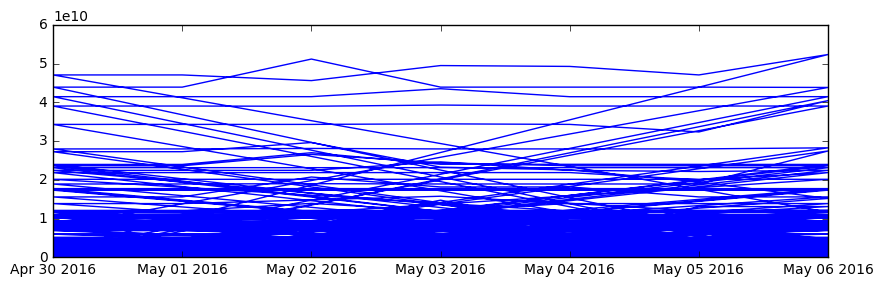

In [13]:
dates = df_gr6['date_object']
counts = df_gr6['ENTRIES']
plt.figure(figsize=(10,3))
plt.plot(dates,counts);

# Challenge 8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [31]:
df['weekofyear'] = df['date_object'].dt.to_period("W")

df.set_index('date_object')
grouped_lists = df_gr6.groupby(['STATION','date_object'])

for i in grouped_lists:
    print(i[1])
#     plt.plot(i[1]['ENTRIES'])


  STATION date_object     ENTRIES        EXITS
0    1 AV  2016-04-30  9365210271  20854612574
  STATION date_object     ENTRIES        EXITS
1    1 AV  2016-05-01  9365326117  20854690837
  STATION date_object      ENTRIES        EXITS
2    1 AV  2016-05-02  10251131526  21725423983
  STATION date_object     ENTRIES        EXITS
3    1 AV  2016-05-03  9365572701  20854843128
  STATION date_object     ENTRIES        EXITS
4    1 AV  2016-05-04  9365722761  20854931387
  STATION date_object     ENTRIES        EXITS
5    1 AV  2016-05-05  9365875888  20855022185
  STATION date_object     ENTRIES        EXITS
6    1 AV  2016-05-06  9366033060  20855116207
  STATION date_object    ENTRIES       EXITS
7  103 ST  2016-04-30  892638599  3544368714
  STATION date_object    ENTRIES       EXITS
8  103 ST  2016-05-01  917944254  3566935311
  STATION date_object    ENTRIES       EXITS
9  103 ST  2016-05-02  918074233  3566998398
   STATION date_object    ENTRIES       EXITS
10  103 ST  2016-05-03  

# Challenge 9

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [ ]:
df1 = pd.read_csv('data/turnstile_160507.txt')
df2 = pd.read_csv('data/turnstile_160514.txt')
df3 = pd.read_csv('data/turnstile_160521.txt')
df4 = pd.read_csv('data/turnstile_160528.txt')
frames = [df, df2, df3, df4]
df_agg = pd.concat(frames)

df_agg_gr = df_agg.groupby(['STATION'], as_index=False).sum()
sort_df_agg_gr = df_agg_gr.sort_values("ENTRIES")
sort_df_agg_gr.head(1)

# Challenge 10

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

In [ ]:
plt.hist(df_agg_gr['ENTRIES'])